## Map to Satellite Chosen File

## Taken from: https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/

In [1]:
# example of loading a pix2pix model and using it for one-off image translation
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import load
from numpy import vstack
from numpy import expand_dims
from numpy.random import randint
from matplotlib import pyplot
import glob
import os

## Helper functions

In [2]:
# load an image
def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = expand_dims(pixels, 0)
    return pixels

# load and prepare training images
def load_real_samples(filename):
    # load compressed arrays
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X2, X1]

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()


def getModels():
    models = []
    glb = glob.glob(r'./**', recursive=True)
    for name in glb:
        if name[-2:] == "h5":
            models.append(name)
           
    return models

## Entry Point

def process_file(button):
    # load source image
    src_image = load_image('satellite.jpg')
    print('Loaded', src_image.shape)
    # load model
    model = load_model(mod1.value)
    # generate image from source
    gen_image = model.predict(src_image)
    # scale from [-1,1] to [0,1]
    gen_image = (gen_image + 1) / 2.0
    # plot the image
    pyplot.imshow(gen_image[0])
    pyplot.axis('off')
    pyplot.show()

In [3]:
def process_file(button):    
    # load dataset
    [X1, X2] = load_real_samples('maps_256.npz')
    print('Loaded', X1.shape, X2.shape)
    # load model
    #print("mod1.value: ", mod1.value)
    model = load_model(mod1.value)
    # select random example
    #ix = randint(0, len(X1), 1)
    #print("type(ix):", type(ix))
    #ix = [250]
    ix = [img.value]
    print("ix: ", ix)
    src_image, tar_image = X1[ix], X2[ix]
    # generate image from source
    gen_image = model.predict(src_image)
    # plot all three images
    plot_images(src_image, gen_image, tar_image)

def process_file(button):    
    # load dataset
    src_image = load_image('satellite.jpg')
    print('Loaded', src_image.shape)
    # load model
    model = load_model(mod1.value)
    # generate image from source
    gen_image = model.predict(src_image)
    # scale from [-1,1] to [0,1]
    gen_image = (gen_image + 1) / 2.0
    # plot all three images
    plot_images(src_image, gen_image, tar_image)

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)
ix:  [34]


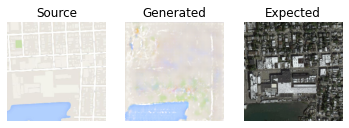

In [4]:
from ipywidgets import widgets
mods = getModels()
img = widgets.IntText(value=0, description='Image Number:', disabled=False)
mod1 = widgets.Dropdown(options = mods)
submit = widgets.Button(description='Submit')
submit.on_click(process_file)
widgets.HBox([mod1, img, submit])